In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [134]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/IDS_506/Assignment6

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IDS_506/Assignment6


In [135]:
import pandas as pd

# Define file path
file_path = '/content/drive/MyDrive/IDS_506/Assignment6/training_data.csv'  # Ensure the correct file extension

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,...,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,...,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,...,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,...,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [137]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15385 non-null  int64  
 1   diagnosis_date        15385 non-null  object 
 2   gleason_score         15065 non-null  float64
 3   t_score               15385 non-null  object 
 4   n_score               15385 non-null  object 
 5   m_score               15385 non-null  object 
 6   stage                 15385 non-null  object 
 7   age                   14637 non-null  float64
 8   race                  15220 non-null  float64
 9   height                14021 non-null  float64
 10  weight                14068 non-null  float64
 11  family_history        13799 non-null  float64
 12  first_degree_history  13799 non-null  float64
 13  previous_cancer       13799 non-null  float64
 14  smoker                13799 non-null  float64
 15  side               

(15385, 33)

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15385.0,7693.000000,4441.411281,1.0,3847.0,7693.0,11539.0,15385.0
gleason_score,15065.0,7.299967,1.933395,3.0,6.0,7.0,9.0,14.0
age,14637.0,76.901073,9.617403,32.0,71.0,78.0,84.0,107.0
race,15220.0,3.480486,0.953454,1.0,3.0,4.0,4.0,4.0
height,14021.0,69.151202,1.127451,65.0,68.0,69.0,70.0,73.0
weight,14068.0,176.800043,17.211988,118.0,166.0,174.0,184.0,343.0
family_history,13799.0,0.423871,0.613645,0.0,0.0,0.0,1.0,5.0
first_degree_history,13799.0,0.211899,0.460531,0.0,0.0,0.0,0.0,4.0
previous_cancer,13799.0,0.068773,0.253077,0.0,0.0,0.0,0.0,1.0
smoker,13799.0,0.054932,0.227855,0.0,0.0,0.0,0.0,1.0


In [139]:
# List of columns to convert
columns_to_category = ['rd_thrpy', 'h_thrpy', 'chm_thrpy', 'cry_thrpy',
                       'brch_thrpy', 'rad_rem', 'multi_thrpy','survival_1_year','race','family_history','first_degree_history','previous_cancer','smoker',
                       'survival_7_years']

# Convert to category
df[columns_to_category] = df[columns_to_category].astype('category')




In [140]:
# Loop through all columns and print value counts
for col in df.columns:
    print(f"\n===== {col} =====")
    print(df[col].value_counts(dropna=False))



===== id =====
id
15385    1
1        1
2        1
3        1
4        1
        ..
14       1
13       1
12       1
11       1
10       1
Name: count, Length: 15385, dtype: int64

===== diagnosis_date =====
diagnosis_date
Feb-06    336
Nov-06    332
Dec-06    330
Oct-06    319
Dec-05    306
Mar-06    296
Jan-06    288
Aug-06    284
Nov-05    283
Apr-06    282
Sep-06    282
Nov-04    279
Jan-05    279
Feb-05    270
Jan-04    265
May-06    263
Oct-05    261
Jun-06    260
Feb-04    258
Dec-04    257
Apr-05    254
May-05    252
Oct-04    249
Jul-06    243
Sep-05    243
May-04    236
Jan-03    235
Sep-04    233
Aug-05    232
Mar-04    227
Jun-05    220
Jul-05    220
Apr-04    209
Nov-03    209
Mar-05    208
Jun-04    207
Jan-00    198
Feb-03    194
Nov-02    191
Sep-03    187
Oct-03    184
Aug-04    182
Mar-03    182
Dec-03    181
Oct-02    174
Apr-03    172
Jan-01    170
Nov-00    165
Feb-00    164
Jul-04    161
May-03    159
Dec-02    156
Aug-03    151
Feb-01    150
Nov-01    148
Sep-02

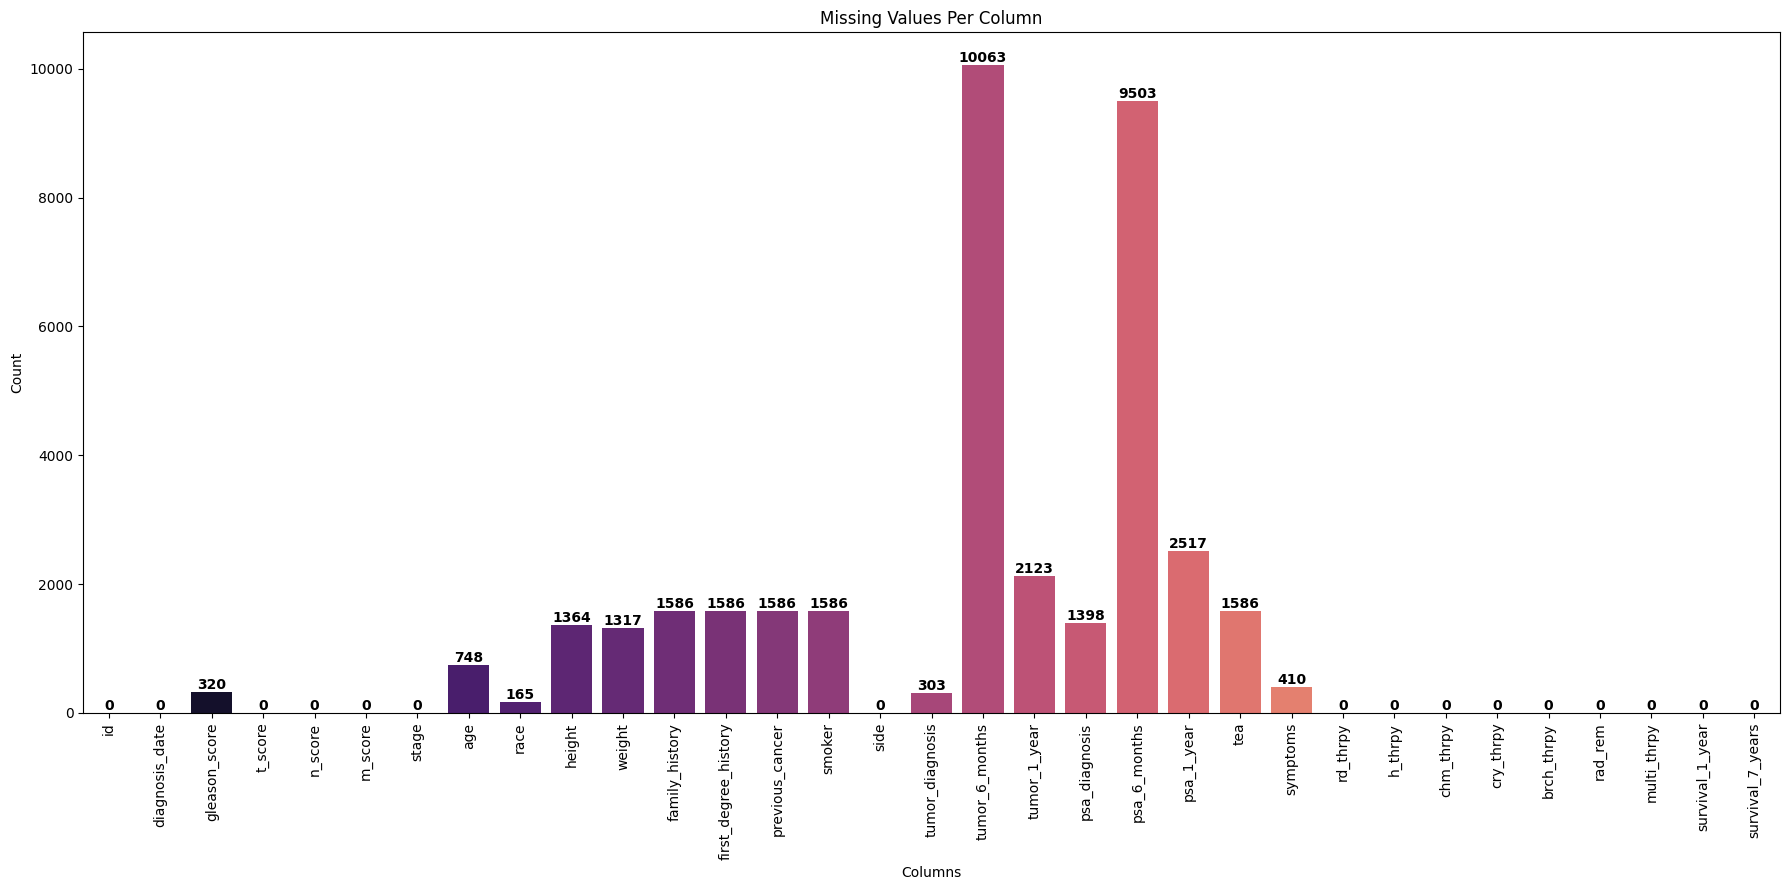

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate missing values
missing_values = df.isnull().sum()

# Calculate non-missing values
non_missing_values = df.notnull().sum()

# Create the plot
plt.figure(figsize=(18, 9))
bars = sns.barplot(x=missing_values.index, y=missing_values.values, palette="magma")

# Add integer labels on top of each bar (no .0)
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.0f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

# Labeling the graph
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.ylabel("Count")
plt.xlabel("Columns")
plt.title("Missing Values Per Column")

plt.tight_layout()
plt.show()

In [142]:
# Display unique values for each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values[:10]}")  # Display only first 10 unique values for readability
    print(f"Total Unique Count: {len(unique_values)}")
    print("-" * 50)


Column: id
Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
Total Unique Count: 15385
--------------------------------------------------
Column: diagnosis_date
Unique Values: ['Jun-05' 'Feb-06' 'Mar-06' 'Feb-05' 'Dec-01' 'Jul-01' 'Oct-05' 'Dec-05'
 'Jan-04' 'Nov-04']
Total Unique Count: 79
--------------------------------------------------
Column: gleason_score
Unique Values: [ 4.  8.  9.  3.  6.  7.  5. 10. nan 13.]
Total Unique Count: 12
--------------------------------------------------
Column: t_score
Unique Values: ['T1c' 'T3a' 'T1a' 'T2b' 'T4' 'T1b' 'T3b' 'T3c' 'T2c' 'T2a']
Total Unique Count: 10
--------------------------------------------------
Column: n_score
Unique Values: ['N0' 'N1' 'NX']
Total Unique Count: 3
--------------------------------------------------
Column: m_score
Unique Values: ['M0' 'M1c' 'M1b' 'M1a']
Total Unique Count: 4
--------------------------------------------------
Column: stage
Unique Values: ['I' 'IV' 'IIB' 'IIA' 'III']
Total Unique Count: 5
-----------

In [143]:
import pandas as pd

# Define age bins and labels
bins = [-np.inf, 60, 70, 80, 90, np.inf]
labels = ['≤60', '60-70', '70-80', '80-90', '90+']

# Create Age Group column while preserving NaN values
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Verify the grouping
print(df['Age_Group'].value_counts(dropna=False))  # Keep NaN values in the count


Age_Group
70-80    5301
80-90    5286
60-70    2412
≤60       924
NaN       748
90+       714
Name: count, dtype: int64


In [144]:
# Calculate BMI using the formula for height in inches and weight in pounds
df['BMI'] = (df['weight'] * 703) / (df['height'] ** 2)

# Display first few rows to verify
print(df[['height', 'weight', 'BMI']].head(20))


    height  weight        BMI
0     66.0   158.0  25.499082
1     70.0   174.0  24.963673
2     69.0     NaN        NaN
3     69.0   173.0  25.544844
4     70.0   201.0  28.837347
5     69.0   166.0  24.511237
6     67.0   166.0  25.996436
7     70.0   157.0  22.524694
8     69.0     NaN        NaN
9     68.0   163.0  24.781358
10    70.0   215.0  30.845918
11    70.0   209.0  29.985102
12    70.0   193.0  27.689592
13    70.0   175.0  25.107143
14     NaN   167.0        NaN
15    68.0   160.0  24.325260
16    67.0   156.0  24.430385
17    71.0   178.0  24.823249
18     NaN   175.0        NaN
19    70.0   166.0  23.815918


In [145]:
import pandas as pd

# Function to group BMI while keeping missing values
def group_bmi(bmi):
    if pd.isna(bmi):  # Keep missing values as they are
        return bmi
    elif bmi <= 24.9:
        return "Normal"
    elif 25.0 <= bmi <= 29.9:
        return "Overweight"
    else:
        return "Obesity"

# Apply the function to create a new BMI category column
df['BMI_Grouped'] = df['BMI'].apply(group_bmi)

# Display grouped BMI counts
print(df['BMI_Grouped'].value_counts(dropna=False))


BMI_Grouped
Overweight    7793
Normal        3811
NaN           2567
Obesity       1214
Name: count, dtype: int64


In [146]:
def process_symptoms(symptom_entry):
    # If the entry is already a list, process it accordingly.
    if isinstance(symptom_entry, list):
        # Normalize each symptom (if it is a string) and get unique symptoms
        unique_symptoms = list({sym.strip().lower() for sym in symptom_entry if isinstance(sym, str)})
        return unique_symptoms, len(unique_symptoms)

    # If the entry is not a list, assume it's a string.
    if pd.isnull(symptom_entry) or symptom_entry.strip() == "":
        return [], 0

    # Split the string by comma, normalize each symptom, and get unique symptoms
    symptoms_list = [sym.strip().lower() for sym in symptom_entry.split(',')]
    unique_symptoms = list(set(symptoms_list))
    return unique_symptoms, len(unique_symptoms)

# Apply the function to the 'symptoms' column and create new columns:
df[['symptoms', 'symptoms_score']] = df['symptoms'].apply(
    lambda s: pd.Series(process_symptoms(s))
)

# Check unique values and their frequencies for 'symptoms_score'
unique_scores = df['symptoms_score'].unique()
print("Unique symptom scores:", unique_scores)

score_counts = df['symptoms_score'].value_counts()
print("\nFrequency of each symptom score:")
print(score_counts)
print(df['symptoms_score'].head(15))


Unique symptom scores: [1 2 4 3 5 6 0 7 8 9]

Frequency of each symptom score:
symptoms_score
3    4396
2    4182
4    2649
1    2124
5    1164
0     410
6     350
7      79
8      26
9       5
Name: count, dtype: int64
0     1
1     2
2     4
3     4
4     4
5     3
6     4
7     3
8     3
9     5
10    2
11    3
12    6
13    2
14    2
Name: symptoms_score, dtype: int64


In [147]:
import pandas as pd

# Function to group symptoms_score while preserving NaN values
def group_symptoms(score):
    if pd.isna(score):  # Keep missing values as is
        return None
    elif score in [0, 1]:
        return '0&1'
    elif score >= 5:
        return '5+'
    else:
        return str(score)  # Keep other scores as they are

# Apply grouping while preserving NaN values
df['symptoms_score_grouped'] = df['symptoms_score'].apply(group_symptoms)

# Count occurrences under survival_7_years = 0 and 1 while keeping NaN values
symptoms_survival_counts = df.groupby('symptoms_score_grouped')['survival_7_years'].value_counts(dropna=False).unstack().fillna(0).astype(int)

# Rename columns for clarity
symptoms_survival_counts = symptoms_survival_counts.rename(columns={0: 'Survival_0', 1: 'Survival_1'})

# Display the results
print(symptoms_survival_counts)


survival_7_years        Survival_0  Survival_1
symptoms_score_grouped                        
0&1                           1369        1165
2                             2300        1882
3                             2457        1939
4                             1497        1152
5+                            1111         513


In [148]:
def bin_tea_to_3_levels(tea_score):
    if pd.isna(tea_score):
        return pd.NA
    elif tea_score <= 1:
        return 1  # Low consumption
    elif 2 <= tea_score <= 4:
        return 2  # Moderate consumption
    else:
        return 3  # High consumption

In [149]:
order = ["70-80", "≤60", "60-70", "80-90", "90+"]

df["Age_Group"] = pd.Categorical(df["Age_Group"], categories=order, ordered=True)

print(df["Age_Group"].cat.categories)


Index(['70-80', '≤60', '60-70', '80-90', '90+'], dtype='object')


In [150]:
# Define the order with 4.0 as the reference (first)
race_order = [4.0, 2.0, 1.0, 3.0]

# Convert to categorical with the defined order
df["race"] = pd.Categorical(df["race"], categories=race_order, ordered=True)

# Quick check
print(df["race"].cat.categories)
print(df["race"].value_counts())


Index([4.0, 2.0, 1.0, 3.0], dtype='float64')
race
4.0    11413
2.0     2264
1.0      918
3.0      625
Name: count, dtype: int64


In [151]:
def gleason_to_grade_group(score):
    if score <= 6:
        return 1
    elif score == 7:
        return 2
    elif score == 8:
        return 3
    elif score in [9, 10]:
        return 4
    else:
        return -1  # invalid/outlier

# Apply function to the DataFrame column
df["gleason_score_grouped"] = df["gleason_score"].apply(gleason_to_grade_group)

# Quick check
print(df[["gleason_score" , "gleason_score_grouped"]].head())


   gleason_score  gleason_score_grouped
0            4.0                      1
1            8.0                      3
2            9.0                      4
3            8.0                      3
4            8.0                      3


In [152]:
import pandas as pd

# Replace -1.0 with a string label
df["gleason_score_grouped"] = df["gleason_score_grouped"].replace(-1.0, "Invalid Gleason Score")

# Define order (1 → 4 are ordinal; Invalid is separate at the end)
gleason_order = [1.0, 2.0, 3.0, 4.0, "Invalid Gleason Score"]

# Convert to categorical with defined order
df["gleason_score_grouped"] = pd.Categorical(
    df["gleason_score_grouped"],
    categories=gleason_order,
    ordered=True
)

# Quick check
print(df["gleason_score_grouped"].cat.categories)
print(df["gleason_score_grouped"].value_counts())


Index([1.0, 2.0, 3.0, 4.0, 'Invalid Gleason Score'], dtype='object')
gleason_score_grouped
1.0                      4921
4.0                      4284
3.0                      2911
2.0                      2882
Invalid Gleason Score     387
Name: count, dtype: int64


In [153]:
# Define the natural order (Normal < Overweight < Obesity)
bmi_order = ["Normal", "Overweight", "Obesity"]

# Convert to ordered categorical
df["BMI_Grouped"] = pd.Categorical(
    df["BMI_Grouped"],
    categories=bmi_order,
    ordered=True
)

# Quick check
print(df["BMI_Grouped"].cat.categories)
print(df["BMI_Grouped"].value_counts(normalize=True).round(2))


Index(['Normal', 'Overweight', 'Obesity'], dtype='object')
BMI_Grouped
Overweight    0.61
Normal        0.30
Obesity       0.09
Name: proportion, dtype: float64


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      15385 non-null  int64   
 1   diagnosis_date          15385 non-null  object  
 2   gleason_score           15065 non-null  float64 
 3   t_score                 15385 non-null  object  
 4   n_score                 15385 non-null  object  
 5   m_score                 15385 non-null  object  
 6   stage                   15385 non-null  object  
 7   age                     14637 non-null  float64 
 8   race                    15220 non-null  category
 9   height                  14021 non-null  float64 
 10  weight                  14068 non-null  float64 
 11  family_history          13799 non-null  category
 12  first_degree_history    13799 non-null  category
 13  previous_cancer         13799 non-null  category
 14  smoker                

In [155]:
df_drop = df.copy()

In [156]:

df_drop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      15385 non-null  int64   
 1   diagnosis_date          15385 non-null  object  
 2   gleason_score           15065 non-null  float64 
 3   t_score                 15385 non-null  object  
 4   n_score                 15385 non-null  object  
 5   m_score                 15385 non-null  object  
 6   stage                   15385 non-null  object  
 7   age                     14637 non-null  float64 
 8   race                    15220 non-null  category
 9   height                  14021 non-null  float64 
 10  weight                  14068 non-null  float64 
 11  family_history          13799 non-null  category
 12  first_degree_history    13799 non-null  category
 13  previous_cancer         13799 non-null  category
 14  smoker                

In [157]:
import pandas as pd
import numpy as np

symptom_codes = ["O01","O08","O09","O10","O11",
                 "P01","P02","P03",
                 "S04","S07","S10",
                 "U01","U02","U03","U05","U06"]

# Coerce to string dtype safely, then clean
sym = df_drop["symptoms"].astype("string")            # ensures pandas StringDtype
sym = sym.fillna("")                                  # replace NA with empty string
sym = sym.str.upper()                                 # case normalize
sym = sym.str.replace(r"[\[\]\'\"]", "", regex=True)  # remove brackets/quotes
sym = sym.str.replace(";", ",", regex=False)          # unify separators
sym = sym.str.replace(" ", "", regex=False)           # remove spaces

df_drop["symptoms_clean"] = sym

# Multi-hot encode
symptom_dummies = df_drop["symptoms_clean"].str.get_dummies(sep=",")
symptom_dummies = symptom_dummies.reindex(columns=symptom_codes, fill_value=0).astype("int64")

# Attach and (optionally) add count
df_drop = pd.concat([df_drop, symptom_dummies], axis=1)
df_drop["Symptom_Count"] = df_drop[symptom_codes].sum(axis=1)


In [158]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      15385 non-null  int64   
 1   diagnosis_date          15385 non-null  object  
 2   gleason_score           15065 non-null  float64 
 3   t_score                 15385 non-null  object  
 4   n_score                 15385 non-null  object  
 5   m_score                 15385 non-null  object  
 6   stage                   15385 non-null  object  
 7   age                     14637 non-null  float64 
 8   race                    15220 non-null  category
 9   height                  14021 non-null  float64 
 10  weight                  14068 non-null  float64 
 11  family_history          13799 non-null  category
 12  first_degree_history    13799 non-null  category
 13  previous_cancer         13799 non-null  category
 14  smoker                

In [159]:
df_drop.head(30)

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,P03,S04,S07,S10,U01,U02,U03,U05,U06,Symptom_Count
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,...,0,0,0,0,0,0,1,0,0,1
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,...,0,0,1,0,0,0,0,0,1,2
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,...,0,0,0,1,1,1,1,0,0,4
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,...,0,0,0,1,1,1,0,0,0,4
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,0,0,1,0,1,0,1,1,0,4
5,6,Jul-01,3.0,T1a,N0,M0,IIA,75.0,4.0,69.0,...,0,0,0,1,0,1,1,0,0,3
6,7,Oct-05,8.0,T1b,N0,M0,IIB,85.0,4.0,67.0,...,0,0,1,0,1,1,1,0,0,4
7,8,Dec-05,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,0,0,0,0,1,1,1,0,0,3
8,9,Jan-04,6.0,T3b,N0,M0,III,75.0,1.0,69.0,...,0,0,0,0,0,1,1,0,0,3
9,10,Nov-04,7.0,T1a,N0,M0,IIA,83.0,2.0,68.0,...,0,0,1,0,1,1,1,0,0,5


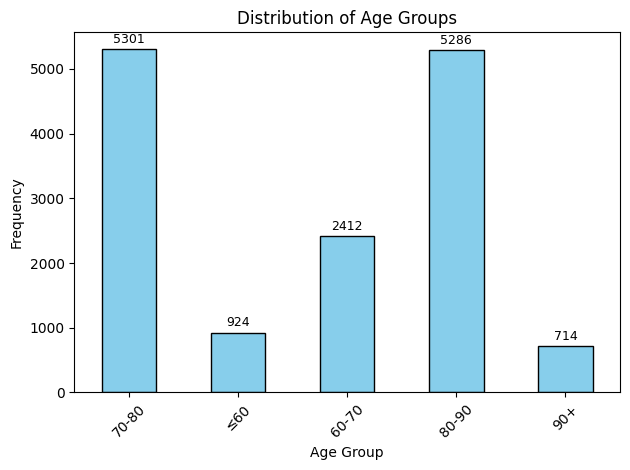

In [160]:
import matplotlib.pyplot as plt

if "Age_Group" in df_drop.columns:
    counts = df_drop["Age_Group"].value_counts().sort_index()

    ax = counts.plot(kind="bar", color="skyblue", edgecolor="black")

    # Add counts on top of each bar
    for i, v in enumerate(counts):
        ax.text(i, v + 50, str(v), ha="center", va="bottom", fontsize=9)

    plt.title("Distribution of Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


                 tumor_diagnosis  tumor_1_year  psa_diagnosis  psa_1_year
tumor_diagnosis         1.000000      0.777495       0.152518    0.315030
tumor_1_year            0.777495      1.000000       0.294016    0.595430
psa_diagnosis           0.152518      0.294016       1.000000    0.803031
psa_1_year              0.315030      0.595430       0.803031    1.000000


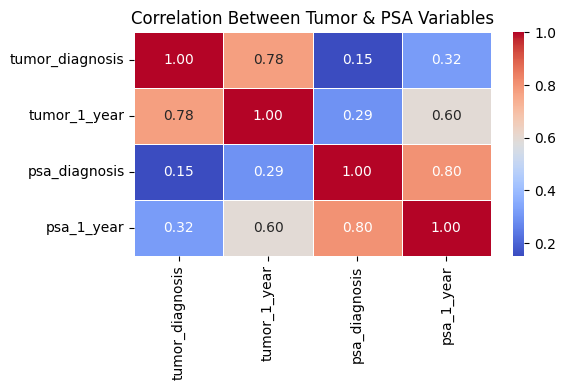

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns you care about
cols = ["tumor_diagnosis", "tumor_1_year", "psa_diagnosis", "psa_1_year"]

if all(c in df_drop.columns for c in cols):
    corr = df_drop[cols].corr(method="pearson")  # Pearson correlation by default

    # Print correlation matrix
    print(corr)

    # Plot heatmap for better visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Between Tumor & PSA Variables")
    plt.tight_layout()
    plt.show()
else:
    print("One or more columns are missing from df_drop")


✅ Skewness Values:
tumor_diagnosis    1.417540
tumor_1_year       0.747508
psa_diagnosis      0.179342
psa_1_year         0.533220
dtype: float64


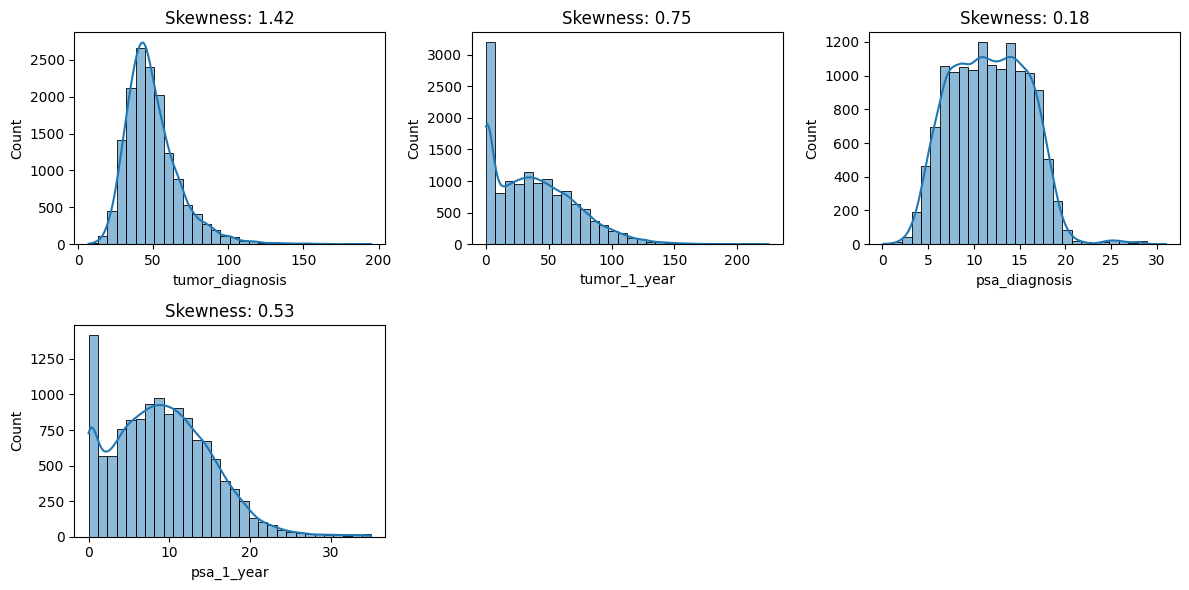

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# List of variables to check skewness
variables = ['tumor_diagnosis', 'tumor_1_year', 'psa_diagnosis', 'psa_1_year']

# Calculate skewness
skew_values = df_drop[variables].skew()
print("✅ Skewness Values:")
print(skew_values)

# Visualizing skewness using histograms
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_drop[var], kde=True, bins=30)
    plt.title(f"Skewness: {round(skew(df_drop[var].dropna()), 2)}")
plt.tight_layout()
plt.show()


In [164]:
import pandas as pd
import scipy.stats as stats

# Perform ANOVA test for numerical variables in df_drop
num_columns = df_drop.select_dtypes(include=['int64', 'float64']).columns
anova_results = {}

target_variable = 'survival_7_years'  # Adjust if needed

for col in num_columns:
    groups = [df_drop[df_drop[target_variable] == val][col].dropna() for val in df_drop[target_variable].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[col] = {'F-Statistic': round(f_stat, 4), 'p-value': round(p_value, 5)}

# Convert results to DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')

# Display results
print("✅ ANOVA Test Results for Numerical Variables:")
print(anova_df)

✅ ANOVA Test Results for Numerical Variables:
                 F-Statistic  p-value
id                    1.1494  0.28370
gleason_score       381.7182  0.00000
age                   3.0398  0.08126
height                0.0518  0.81998
weight                7.4267  0.00643
tumor_diagnosis     138.5794  0.00000
tumor_6_months      115.1799  0.00000
tumor_1_year        323.5691  0.00000
psa_diagnosis        54.5111  0.00000
psa_6_months         71.8769  0.00000
psa_1_year          151.1086  0.00000
tea                   2.3153  0.12813
BMI                   8.7463  0.00311
symptoms_score       80.0218  0.00000
O01                 104.8404  0.00000
O08                  99.1595  0.00000
O09                  96.5918  0.00000
O10                  41.2689  0.00000
O11                   0.2152  0.64271
P01                 172.0079  0.00000
P02                 127.0147  0.00000
P03                  59.0301  0.00000
S04                   1.0841  0.29780
S07                   3.6114  0.05740
S10 

In [165]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      15385 non-null  int64   
 1   diagnosis_date          15385 non-null  object  
 2   gleason_score           15065 non-null  float64 
 3   t_score                 15385 non-null  object  
 4   n_score                 15385 non-null  object  
 5   m_score                 15385 non-null  object  
 6   stage                   15385 non-null  object  
 7   age                     14637 non-null  float64 
 8   race                    15220 non-null  category
 9   height                  14021 non-null  float64 
 10  weight                  14068 non-null  float64 
 11  family_history          13799 non-null  category
 12  first_degree_history    13799 non-null  category
 13  previous_cancer         13799 non-null  category
 14  smoker                

In [166]:
# right after reading the CSV into df
df_drop.drop(columns=["id", "diagnosis_date","BMI","age","height","weight","tumor_6_months","psa_6_months","symptoms_score","symptoms","gleason_score","symptoms_score","symptoms_score_grouped","symptoms_clean"], inplace=True, errors="ignore")



In [167]:
import pandas as pd

symptom_cols = ["O01","O08","O09","O10","O11",
                "P01","P02","P03",
                "S04","S07","S10",
                "U01","U02","U03","U05","U06"]

# 0/1 → ordered categorical
for c in symptom_cols:
    df_drop[c] = pd.Categorical(df_drop[c], categories=[0, 1], ordered=True)

# Symptom_Count → ordered categorical (keep a numeric copy if you still need math on it)
df_drop["Symptom_Count_cat"] = pd.Categorical(df_drop["Symptom_Count"], ordered=True)

# quick check
print(df_drop[symptom_cols].dtypes[:18])
print("Symptom_Count_cat dtype:", df_drop["Symptom_Count_cat"].dtype)


O01    category
O08    category
O09    category
O10    category
O11    category
P01    category
P02    category
P03    category
S04    category
S07    category
S10    category
U01    category
U02    category
U03    category
U05    category
U06    category
dtype: object
Symptom_Count_cat dtype: category


In [168]:
df_drop.drop("Symptom_Count",axis=1,inplace=True)

In [169]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15385 entries, 0 to 15384
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   t_score                15385 non-null  object  
 1   n_score                15385 non-null  object  
 2   m_score                15385 non-null  object  
 3   stage                  15385 non-null  object  
 4   race                   15220 non-null  category
 5   family_history         13799 non-null  category
 6   first_degree_history   13799 non-null  category
 7   previous_cancer        13799 non-null  category
 8   smoker                 13799 non-null  category
 9   side                   15385 non-null  object  
 10  tumor_diagnosis        15082 non-null  float64 
 11  tumor_1_year           13262 non-null  float64 
 12  psa_diagnosis          13987 non-null  float64 
 13  psa_1_year             12868 non-null  float64 
 14  tea                    13799 non-null 

In [170]:
import pandas as pd
import numpy as np

def bin_tea_to_3_levels(s):
    # <=3 -> 1, (3,7] -> 2, >7 -> 3
    s = pd.to_numeric(s, errors="coerce")
    out = pd.Series(np.nan, index=s.index, dtype="float")
    out[s <= 3] = 1
    out[(s > 3) & (s <= 7)] = 2
    out[s > 7] = 3
    return out.astype("Int64")

# Apply to your df_drop
if "tea" in df_drop.columns:
    df_drop["Tea_grouped"] = bin_tea_to_3_levels(df_drop["tea"]).astype("category")
    # make it an ordered categorical: 1 < 2 < 3
    df_drop["Tea_grouped"] = df_drop["Tea_grouped"].cat.set_categories([1, 2, 3], ordered=True)
    # quick check
    print(df_drop["Tea_grouped"].dtype)
    print(df_drop["Tea_grouped"].cat.categories)
    print(df_drop["Tea_grouped"].value_counts(dropna=False))
else:
    print("Column 'tea' not found in df_drop")


category
Index([1, 2, 3], dtype='int64')
Tea_grouped
1      10273
2       3445
NaN     1586
3         81
Name: count, dtype: int64


In [171]:
df_drop.drop(columns=["psa_1_year","tumor_diagnosis","tea"],inplace=True)

In [172]:
df_drop["BMI_Grouped"].value_counts(dropna=False)

,count
BMI_Grouped,
Overweight,7793
Normal,3811
NaN,2567
Obesity,1214


In [173]:
# Drop rows with ANY NaN anywhere
df_drop = df_drop.dropna()

# Drop rows with NaN in specific column(s)
df_drop = df_drop.dropna(subset=["BMI_Grouped"])   # replace with your columns

# Drop rows where ALL values are NaN
df_drop = df_drop.dropna(how="all")

# Drop columns that are ALL NaN
df_drop = df_drop.dropna(axis=1, how="all")


In [174]:
df_drop.shape

(8470, 42)

In [175]:
df_drop.drop(columns=["family_history","previous_cancer","survival_1_year"],inplace=True)

In [176]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

target = "survival_7_years"

# ensure target is categorical
if target in df_drop.columns and str(df_drop[target].dtype) != "category":
    df_drop[target] = df_drop[target].astype("category")

# pick ALL categorical predictors (category or object), exclude target
cat_cols = [
    c for c in df_drop.select_dtypes(include=["category", "object"]).columns
    if c != target
]

rows = []
for col in cat_cols:
    d = df_drop[[col, target]].dropna()
    if d.empty:
        continue
    ct = pd.crosstab(d[col], d[target])
    if ct.shape[0] < 2 or ct.shape[1] < 2:  # need at least 2x2
        continue

    chi2, p, dof, _ = chi2_contingency(ct)
    n = ct.to_numpy().sum()
    r, k = ct.shape
    cramers_v = np.sqrt((chi2 / n) / max(1, min(r - 1, k - 1)))

    rows.append({
        "variable": col,
        "chi2": chi2,
        "p_value": float(p),
        "dof": dof,
        "N": int(n),
        "cramers_v": cramers_v
    })

results = pd.DataFrame(rows).sort_values("p_value", ascending=True)

# significance flag and nice p-value formatting
alpha = 0.05
results["significant"] = np.where(results["p_value"] < alpha, "Yes", "No")
results["p_value"] = results["p_value"].apply(lambda x: format(x, ".10f"))

pd.set_option("display.max_rows", 200)
print(results)


                 variable        chi2       p_value  dof     N  cramers_v  \
1                 n_score  437.340838  0.0000000000    2  8470   0.227231   
3                   stage  373.235403  0.0000000000    4  8470   0.209918   
17  gleason_score_grouped  236.714618  0.0000000000    4  8470   0.167175   
2                 m_score  189.372768  0.0000000000    3  8470   0.149526   
8                rd_thrpy  121.051351  0.0000000000    1  8470   0.119548   
23                    P01   85.461198  0.0000000000    1  8470   0.100448   
24                    P02   61.399167  0.0000000000    1  8470   0.085141   
0                 t_score   79.857753  0.0000000000    9  8470   0.097099   
18                    O01   48.774488  0.0000000000    1  8470   0.075885   
10              chm_thrpy   45.022802  0.0000000000    1  8470   0.072908   
19                    O08   40.770900  0.0000000002    1  8470   0.069380   
34      Symptom_Count_cat   61.701952  0.0000000006    9  8470   0.085351   

In [177]:
import pandas as pd
from scipy.stats import chi2_contingency

# Chi-square helper for df_drop (no missing values assumed)
def chi2_for(col, df=df_drop, target="survival_7_years"):
    if col in df.columns and target in df.columns:
        tbl = pd.crosstab(df[col], df[target])  # no dropna needed
        if tbl.shape[0] > 1 and tbl.shape[1] > 1:  # need at least 2x2
            chi2, p, dof, _ = chi2_contingency(tbl)
            print(f"{col:>18}: p-value = {p:.5f}  (chi2={chi2:.2f}, dof={dof})")
        else:
            print(f"{col:>18}: skipped (degenerate table)")
    else:
        print(f"{col:>18}: not present")

# Run for your chosen predictors
for col in [
    "t_score","n_score","m_score","race","previous_cancer","smoker","rd_thrpy","h_thrpy",
    "chm_thrpy","cry_thrpy","brch_thrpy","rad_rem","multi_thrpy","survival_1_year","side",
    "stage","symptoms","BMI_Grouped"
]:
    chi2_for(col)


           t_score: p-value = 0.00000  (chi2=79.86, dof=9)
           n_score: p-value = 0.00000  (chi2=437.34, dof=2)
           m_score: p-value = 0.00000  (chi2=189.37, dof=3)
              race: p-value = 0.04943  (chi2=7.84, dof=3)
   previous_cancer: not present
            smoker: p-value = 0.03366  (chi2=4.51, dof=1)
          rd_thrpy: p-value = 0.00000  (chi2=121.05, dof=1)
           h_thrpy: p-value = 0.25697  (chi2=1.29, dof=1)
         chm_thrpy: p-value = 0.00000  (chi2=45.02, dof=1)
         cry_thrpy: p-value = 0.00000  (chi2=23.52, dof=1)
        brch_thrpy: p-value = 0.00093  (chi2=10.97, dof=1)
           rad_rem: p-value = 0.26082  (chi2=1.26, dof=1)
       multi_thrpy: p-value = 0.00000  (chi2=35.81, dof=1)
   survival_1_year: not present
              side: p-value = 0.63316  (chi2=0.91, dof=2)
             stage: p-value = 0.00000  (chi2=373.24, dof=4)
          symptoms: not present
       BMI_Grouped: p-value = 0.04736  (chi2=6.10, dof=2)


,variable,chi2,p_value,dof,N,cramers_v,significant
1,n_score,437.340838,0.000000e+00,2,8470,0.227231,Yes
3,stage,373.235403,0.000000e+00,4,8470,0.209918,Yes
17,gleason_score_grouped,236.714618,0.000000e+00,4,8470,0.167175,Yes
2,m_score,189.372768,0.000000e+00,3,8470,0.149526,Yes
8,rd_thrpy,121.051351,0.000000e+00,1,8470,0.119548,Yes
23,P01,85.461198,0.000000e+00,1,8470,0.100448,Yes
24,P02,61.399167,0.000000e+00,1,8470,0.085141,Yes
0,t_score,79.857753,0.000000e+00,9,8470,0.097099,Yes
18,O01,48.774488,0.000000e+00,1,8470,0.075885,Yes
10,chm_thrpy,45.022802,0.000000e+00,1,8470,0.072908,Yes


In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable     24 non-null     object 
 1   chi2         24 non-null     float64
 2   p_value      24 non-null     float64
 3   dof          24 non-null     int64  
 4   N            24 non-null     int64  
 5   cramers_v    24 non-null     float64
 6   significant  24 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ KB


In [131]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pathlib import Path
import pandas as pd

# ---- settings ----
target = "survival_7_years"

# 1) Features = significant variables from df2 (keep only those present in df_drop)
feat_cols = [c for c in df2["variable"].tolist() if c in df_drop.columns]

# 2) Build modeling frame
present_needed = [target] + feat_cols
cancer_model = df_drop[present_needed].copy()

# 3) Train/test split (stratified)
train, test = train_test_split(
    cancer_model, test_size=0.30, random_state=2, stratify=cancer_model[target]
)


# 5) y as float (0/1); X as dummies
y_train = train[target].astype(float)
y_test  = test[target].astype(float)

X_cols = [c for c in present_needed if c != target]
X_train = pd.get_dummies(train[X_cols], drop_first=True)
X_test  = pd.get_dummies(test[X_cols],  drop_first=True)

# 6) Intercept
X_train = sm.add_constant(X_train, has_constant="add")
X_test  = sm.add_constant(X_test,  has_constant="add")

# 7) Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 8) Coerce numeric & drop degenerate columns
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")

all_na_cols = [c for c in X_train.columns if X_train[c].isna().all()]
if all_na_cols:
    X_train.drop(columns=all_na_cols, inplace=True)
    X_test.drop(columns=all_na_cols, inplace=True)

const_cols = [c for c in X_train.columns if X_train[c].nunique(dropna=True) <= 1]
if const_cols:
    X_train.drop(columns=const_cols, inplace=True)
    X_test.drop(columns=const_cols, inplace=True)

# 9) Drop any rows with NA in X or y (defensive; you said no missing)
row_mask = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train.loc[row_mask]
y_train = y_train.loc[row_mask]

# 10) Final dtypes
X_train = X_train.astype(float)
X_test  = X_test.astype(float)
y_train = y_train.astype(float)
y_test  = y_test.astype(float)

X_train.shape, X_test.shape


((6741, 54), (2890, 54))

In [132]:
logit_model = sm.Logit(y_train, X_train).fit(disp=False)
print(logit_model.summary())

# Odds ratios (exp(coef))
odds = np.exp(logit_model.params)
odds.name = "odds_ratio"
display(odds.sort_values(ascending=False))

                           Logit Regression Results                           
Dep. Variable:       survival_7_years   No. Observations:                 6741
Model:                          Logit   Df Residuals:                     6687
Method:                           MLE   Df Model:                           53
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                 0.09149
Time:                        17:27:01   Log-Likelihood:                -4192.3
converged:                      False   LL-Null:                       -4614.5
Covariance Type:            nonrobust   LLR p-value:                5.457e-143
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
n_score_N1                                     -0.8967      0.102     -8.820      0.000      -1.096      -0.697
n_score_NX                      

,odds_ratio
Symptom_Count_cat_3,1.880128e+00
Symptom_Count_cat_2,1.840250e+00
Symptom_Count_cat_4,1.828457e+00
Symptom_Count_cat_5,1.739431e+00
Symptom_Count_cat_7,1.703208e+00
Symptom_Count_cat_6,1.605210e+00
Symptom_Count_cat_1,1.498176e+00
Symptom_Count_cat_8,1.486753e+00
t_score_T4,1.285460e+00
stage_III,1.278929e+00


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
import pandas as pd
import numpy as np

target = "survival_7_years"

selected = [
    "n_score","stage","gleason_score_grouped","m_score","rd_thrpy",
    "P01","P02","t_score","O01","chm_thrpy","O08","Symptom_Count_cat",
    "multi_thrpy","O09","U05","cry_thrpy","P03","S10","O10",
    "Age_Group","brch_thrpy","smoker","BMI_Grouped","race",
    "tumor_1_year","psa_diagnosis"
]

# 1) Keep only present columns
feat_cols = [c for c in selected if c in df_drop.columns]
present_needed = [target] + feat_cols
cancer_model = df_drop[present_needed].copy()

# 2) Target -> 0/1 float
cancer_model[target] = (
    cancer_model[target].astype(str).str.strip().str.lower()
      .map({"1":1, "0":0, "yes":1, "no":0, "true":1, "false":0})
).astype(float)

# 3) ONLY these two as numeric
for c in ["tumor_1_year", "psa_diagnosis"]:
    if c in cancer_model.columns:
        cancer_model[c] = pd.to_numeric(cancer_model[c], errors="coerce")

# 4) Drop rows with any NA among used cols
cancer_model = cancer_model.dropna(subset=present_needed)

# 5) Split
train, test = train_test_split(
    cancer_model, test_size=0.30, random_state=2, stratify=cancer_model[target]
)

# 6) y and X
y_train = train[target].astype(float)
y_test  = test[target].astype(float)

X_cols = feat_cols
# All non-numeric features remain categorical and get one-hot encoded
X_train = pd.get_dummies(train[X_cols], drop_first=True)
X_test  = pd.get_dummies(test[X_cols],  drop_first=True)

# 7) Intercept
X_train = sm.add_constant(X_train, has_constant="add")
X_test  = sm.add_constant(X_test,  has_constant="add")

# 8) Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 9) Ensure numeric & drop degenerate columns
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")

all_na_cols = [c for c in X_train.columns if X_train[c].isna().all()]
if all_na_cols:
    X_train.drop(columns=all_na_cols, inplace=True)
    X_test.drop(columns=all_na_cols, inplace=True)

const_cols = [c for c in X_train.columns if X_train[c].nunique(dropna=True) <= 1]
if const_cols:
    X_train.drop(columns=const_cols, inplace=True)
    X_test.drop(columns=const_cols, inplace=True)

row_mask = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train.loc[row_mask].astype(float)
y_train = y_train.loc[row_mask].astype(float)

X_test = X_test.astype(float)
y_test = y_test.astype(float)

print("Shapes:", X_train.shape, X_test.shape)

# 10) Fit & evaluate
logit_model = sm.Logit(y_train, X_train).fit(disp=False)
print(logit_model.summary())

odds = np.exp(logit_model.params).sort_values(ascending=False)
print("\nTop odds ratios:\n", odds.head(100))

train_prob = logit_model.predict(X_train)
test_prob  = logit_model.predict(X_test)
train_pred = (train_prob > 0.5).astype(int)
test_pred  = (test_prob  > 0.5).astype(int)

print("\nTRAIN Confusion Matrix:\n", confusion_matrix(y_train, train_pred, labels=[0,1]))
print("\nTRAIN Report:\n", classification_report(y_train, train_pred, digits=4))
print("\nTEST Confusion Matrix:\n", confusion_matrix(y_test, test_pred, labels=[0,1]))
print("\nTEST Report:\n", classification_report(y_test, test_pred, digits=4))


Shapes: (5929, 57) (2541, 57)
                           Logit Regression Results                           
Dep. Variable:       survival_7_years   No. Observations:                 5929
Model:                          Logit   Df Residuals:                     5872
Method:                           MLE   Df Model:                           56
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                 0.09308
Time:                        18:59:40   Log-Likelihood:                -3724.9
converged:                       True   LL-Null:                       -4107.2
Covariance Type:            nonrobust   LLR p-value:                4.915e-125
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
tumor_1_year                                   -0.0076      0.001     -7.627      0.000      -0.010      -0.006
ps

In [184]:
# ====== place this AFTER your train/test split (step 5) ======
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf

target = "survival_7_years"

# numeric vars only
numeric_vars = [c for c in ["tumor_1_year", "psa_diagnosis"] if c in train.columns]

# use the same candidate set you built earlier
candidates = [c for c in feat_cols if c in train.columns]

# helper to build a Patsy formula with C() for categoricals
def build_formula(y, predictors, numeric_set):
    terms = []
    for v in predictors:
        terms.append(v if v in numeric_set else f"C({v})")
    rhs = " + ".join(terms) if terms else "1"
    return f"{y} ~ {rhs}"

def fit_aic(formula, data):
    try:
        m = smf.logit(formula=formula, data=data).fit(disp=False)
        return m.aic, m
    except Exception:
        return np.inf, None

def stepwise_selection(data, y, candidates, numeric_set, tol=1e-4, verbose=True):
    selected = []
    current_aic, current_model = fit_aic(f"{y} ~ 1", data)
    if verbose:
        print(f"Start AIC (intercept-only): {current_aic:.4f}")
    improved = True
    while improved:
        improved = False
        # forward
        remaining = [v for v in candidates if v not in selected]
        best_var, best_aic, best_model = None, current_aic, current_model
        for v in remaining:
            aic, mdl = fit_aic(build_formula(y, selected + [v], numeric_set), data)
            if aic + tol < best_aic:
                best_var, best_aic, best_model = v, aic, mdl
        if best_var is not None:
            selected.append(best_var)
            current_aic, current_model = best_aic, best_model
            improved = True
            if verbose: print(f" + Added: {best_var:<25} AIC: {current_aic:.4f}")
        # backward
        worst, best_aic_back, best_model_back = None, current_aic, current_model
        for v in list(selected):
            aic, mdl = fit_aic(build_formula(y, [t for t in selected if t != v], numeric_set), data)
            if aic + tol < best_aic_back:
                worst, best_aic_back, best_model_back = v, aic, mdl
        if worst is not None:
            selected.remove(worst)
            current_aic, current_model = best_aic_back, best_model_back
            improved = True
            if verbose: print(f" - Dropped: {worst:<25} AIC: {current_aic:.4f}")
    if verbose:
        print("\nFinal vars:", selected)
        print("Final AIC:", current_aic)
    return selected, current_model

# run stepwise on TRAIN ONLY (no leakage)
chosen_vars, final_train_model = stepwise_selection(
    data=train, y=target, candidates=candidates, numeric_set=set(numeric_vars)
)

print("\n===== FINAL TRAIN MODEL SUMMARY =====")
print(final_train_model.summary())

# ---- Evaluate on train & test using only the chosen variables ----
def evaluate(model, df, split_name):
    proba = model.predict(df)
    y_true = df[target].astype(int).values
    y_pred = (proba > 0.5).astype(int)
    print(f"\n--- {split_name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred, labels=[0,1]))
    print("Classification Report:\n", classification_report(y_true, y_pred, digits=4))

evaluate(final_train_model, train[[target] + chosen_vars], "TRAIN")
evaluate(final_train_model, test [[target] + chosen_vars], "TEST")


Start AIC (intercept-only): 8216.4067
 + Added: n_score                   AIC: 7904.0856
 + Added: gleason_score_grouped     AIC: 7724.9656
 + Added: tumor_1_year              AIC: 7665.0168
 + Added: m_score                   AIC: 7606.0247
 + Added: rd_thrpy                  AIC: 7559.0109
 + Added: Age_Group                 AIC: 7537.9889
 + Added: U05                       AIC: 7524.7064
 + Added: brch_thrpy                AIC: 7515.8906
 + Added: S10                       AIC: 7509.6624
 + Added: multi_thrpy               AIC: 7506.3504
 + Added: O09                       AIC: 7504.3093
 + Added: smoker                    AIC: 7502.6771
 + Added: race                      AIC: 7501.9045

Final vars: ['n_score', 'gleason_score_grouped', 'tumor_1_year', 'm_score', 'rd_thrpy', 'Age_Group', 'U05', 'brch_thrpy', 'S10', 'multi_thrpy', 'O09', 'smoker', 'race']
Final AIC: 7501.904503734306

===== FINAL TRAIN MODEL SUMMARY =====
                           Logit Regression Results          

In [185]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# ----- inputs -----
target = "survival_7_years"
candidates = [
    "n_score","stage","gleason_score_grouped","m_score","rd_thrpy",
    "P01","P02","t_score","O01","chm_thrpy","O08","Symptom_Count_cat",
    "multi_thrpy","O09","U05","cry_thrpy","P03","S10","O10",
    "Age_Group","brch_thrpy","smoker","BMI_Grouped","race",
    "tumor_1_year","psa_diagnosis"
]

df = df2.copy()  # <- you said df2 is your dataset

# ensure target is 0/1 numeric
if str(df[target].dtype) == "category":
    df[target] = df[target].astype(int)
df[target] = pd.to_numeric(df[target], errors="coerce")

# helper: use C() for categoricals / low-cardinality ints, raw name for continuous
def term_for(col):
    s = df[col]
    if (str(s.dtype) == "category") or (s.dtype == "object") or (pd.api.types.is_integer_dtype(s) and s.nunique() <= 10):
        return f"C({col})"
    return col

# drop rows with any NA in target or the variables we might use
use_cols = [target] + [c for c in candidates if c in df.columns]
df = df[use_cols].dropna().copy()

selected_vars = []
remaining = [c for c in candidates if c in df.columns]

best_aic = np.inf
tol = 1e-6  # minimal AIC improvement required to add a variable

while remaining:
    scores = []
    for v in remaining:
        rhs_terms = [term_for(x) for x in (selected_vars + [v])]
        formula = f"{target} ~ " + " + ".join(rhs_terms)
        try:
            fit = smf.logit(formula, data=df).fit(disp=False)
            scores.append((fit.aic, v, fit))
        except Exception:
            # skip variables that cause singularities/separation
            continue
    if not scores:
        break
    scores.sort(key=lambda x: x[0])  # by AIC
    best_try_aic, best_var, best_fit = scores[0]
    if best_try_aic + tol < best_aic:
        selected_vars.append(best_var)
        remaining.remove(best_var)
        best_aic = best_try_aic
    else:
        break  # no further improvement

# fit final model
final_rhs = " + ".join(term_for(x) for x in selected_vars) if selected_vars else "1"
final_formula = f"{target} ~ {final_rhs}"
final_model = smf.logit(final_formula, data=df).fit(disp=False)

print("Forward stepwise (AIC) finished.")
print("Selected variables (in entry order):", selected_vars)
print("Final formula:", final_formula)
print(final_model.summary())

# ---- Optional: adjusted Odds Ratios table ----
or_table = pd.DataFrame({
    "term": final_model.params.index,
    "coef": final_model.params.values,
    "p_value": final_model.pvalues.values
})
ci = final_model.conf_int()
ci.columns = ["ci_low_logit", "ci_high_logit"]
or_table = or_table.join(ci, how="left")
or_table["OR"] = np.exp(or_table["coef"])
or_table["OR_CI_low"] = np.exp(or_table["ci_low_logit"])
or_table["OR_CI_high"] = np.exp(or_table["ci_high_logit"])
or_table = or_table.drop(columns=["ci_low_logit","ci_high_logit"])
or_table["p_value"] = or_table["p_value"].apply(lambda x: format(float(x), ".10f"))

print("\nAdjusted Odds Ratios (reference = first category for each C(var)):")
print(or_table[or_table["term"]!="Intercept"].sort_values("p_value").reset_index(drop=True))


KeyError: 'survival_7_years'